# Data Preprocessing 

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
df=pd.read_csv(r'C:\Users\Saketh Chintalapudi\Downloads\iris_v2.csv')

C:\Users\Saketh Chintalapudi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Saketh Chintalapudi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(145, 5)


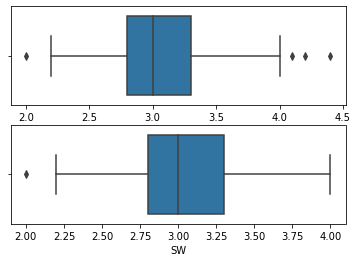

In [4]:
plt.subplot(2,1,1) 
sns.boxplot(df3["SW"]) 
df4=df3.loc[df3.SW<=4] 
plt.subplot(2,1,2) 
sns.boxplot(df4["SW"]) 
print(df4.shape)

In [19]:
df5=df4.copy() 
print(set(df5.Species)) 
df5.Species.replace({"Setosa":1,"Versicolor":2,"Virginica":3} 
 ,inplace=True) 
print(set(df5.Species)) 
LE=preprocessing.LabelEncoder() 
df6=df4.copy() 
df6["Species"]=LE.fit_transform(df6["Species"]) 
print(set(df6.Species)) 
X,Y= df4.iloc[:, 0:-1],df4[["Species"]]


{'Versicolor', 'Setosa', 'Virginica'}
{1, 2, 3}
{0, 1, 2}


In [20]:
print(X) 
print(Y) 
OHE = preprocessing.OneHotEncoder() 
Y_transformed=OHE.fit_transform(Y) 
print(Y_transformed.toarray())

      SL   SW   PL   PW
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
..   ...  ...  ...  ...
148  6.7  3.0  5.2  2.3
149  6.3  2.5  5.0  1.9
150  6.5  3.0  5.2  2.0
151  6.2  3.4  5.4  2.3
152  5.9  3.0  5.1  1.8

[145 rows x 4 columns]
       Species
0       Setosa
1       Setosa
2       Setosa
3       Setosa
4       Setosa
..         ...
148  Virginica
149  Virginica
150  Virginica
151  Virginica
152  Virginica

[145 rows x 1 columns]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1.

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, 
test_size=0.33,random_state=0) 
print(X_train.shape,X_test.shape) 
print(Y_train.shape,Y_test.shape) 
print(Y_train.head())

(97, 4) (48, 4)
(97, 1) (48, 1)
       Species
32      Setosa
61  Versicolor
91  Versicolor
83  Versicolor
70  Versicolor


In [50]:
df.shape

(154, 6)

In [51]:
df.columns

Index(['ID', 'SL', 'SW', 'PL', 'PW', 'Species'], dtype='object')

In [52]:
df.drop('ID',axis='columns',inplace=True)

In [53]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Species'], dtype='object')

In [54]:
df.drop_duplicates(inplace=True)

In [55]:
df.shape

(148, 5)

In [56]:
df.isnull().sum()

SL         7
SW         0
PL         2
PW         0
Species    0
dtype: int64

In [57]:
df1=df.copy()

In [61]:
df1.dropna(inplace=True)

In [62]:
df1.shape

(139, 5)

In [63]:
df2=df.copy()

In [64]:
df2['SL']=df2['SL'].fillna(df2['SL'].mean())

In [66]:
df2.isnull().sum()

SL         0
SW         0
PL         2
PW         0
Species    0
dtype: int64

In [68]:
df2['PL']=df2['PL'].fillna(df2['PL'].median())

In [70]:
df2.isnull().sum()

SL         0
SW         0
PL         0
PW         0
Species    0
dtype: int64

In [72]:
df2.shape

(148, 5)

In [74]:
df2['PL'].median()

4.35

In [76]:
df2.describe()

,SL,SW,PL,PW
count,148.000000,148.000000,148.000000,148.000000
mean,5.860993,3.052703,3.771622,1.208784
std,0.803460,0.437128,1.742068,0.755292
min,4.300000,2.000000,1.000000,0.100000
25%,5.175000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [78]:
df['SL'].mean()

5.860992907801419

C:\Users\Saketh Chintalapudi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SW'>

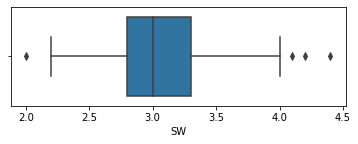

In [80]:
plt.subplot(2,1,1)
sns.boxplot(df2['SW'])